In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

plt.style.use('_mpl-gallery')

In [3]:
def coin_simulation(coins, coin_flips):
    '''
    Takes the amount of coins and performs 'coin_flip' amount of flips. Returns the resulting 'v' of the 
    flips as an entry in 'results'. Let v be the fraction of the amount of heads in the sample.

    Parameters:
    -- coins: int, the amount of coins that are to be flipped
    -- coin_flips: int, the amount of time each coin will be flipped

    Returns:
    -- frequencies: np.array of shape (coins,) containing the frequency of heads for every coin

    '''

    # each row represents the results of the coin flips
    flip_results = np.random.randint(low=0, high=2, size=(coins, coin_flips), dtype=np.int16)

    # sum the results for each row and find the frequency of heads (1)
    heads = np.sum(flip_results, axis=1)
    frequencies = heads / coin_flips

    return frequencies

def h_bound(error, n):
    """
    Returns the Hoeffding bound applied to a np.array
    
    Parameters:
    -- n: int, the number of samples
    -- error: float, deviation from the mean
    
    """
    return 2 * np.exp(-2 * error**2 * n)

# Empirical probability P[|v - mu| > epsilon]
def empirical_probability(v, mu, ep_values):
    '''
    Returns the average of the v's that are greater then the error in the
    range of ep_values

    Parameters:
    -- v: np.array, contains the v_values resulting from the experiment iterations
    -- mu: Bin average
    -- 

    Returns:
    -- probabilities: np.array, contains the average of v's greater than the error
    '''
    probabilities = []

    # for 100 iterations, find the probability that the error of the experiments is greater then 
    # the given error value. Find the mean of that amount
    for ep in ep_values:
        prob = np.sum(np.abs(v - mu) > ep)
        # print(prob / len(v))
        probabilities.append(prob / len(v))
    return np.array(probabilities)

In [4]:
''' initializing parameters and running the experiment once '''
coins = 1000
coin_flips = 10
experiment = coin_simulation(coins, coin_flips)

# print the in sample mean values (v)
print(experiment[:5], "... size:", len(experiment))

# store the 3 v's
v_1 = experiment[0]
v_rand = experiment[np.random.randint(0, coins - 1, dtype=np.int16)]
v_min = np.min(experiment)

print("first index:", v_1)
print("random point:", v_rand)
print("minimum value:", v_min)
print("average over the sample:", np.sum(experiment) / coins)

[0.3 0.5 0.2 0.3 0.2] ... size: 1000
first index: 0.3
random point: 0.2
minimum value: 0.0
average over the sample: 0.507


In [5]:
''' run the "entire" experiment many more times '''
experiment_itrs = 100000
v_1 = np.zeros(experiment_itrs)
v_rand = np.zeros(experiment_itrs)
v_min = np.zeros(experiment_itrs)

for j in range(experiment_itrs):
    experiment = coin_simulation(coins, coin_flips)
    v_1[j] = experiment[0]
    v_rand[j] = experiment[np.random.randint(0, coins - 1, dtype=np.int16)]
    v_min[j] = np.min(experiment)


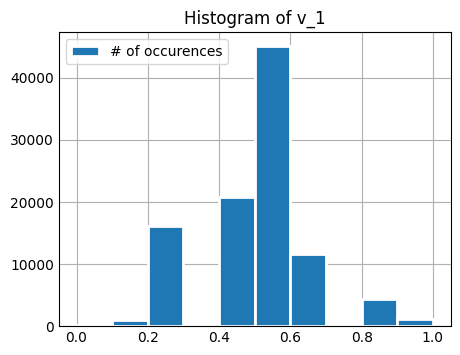

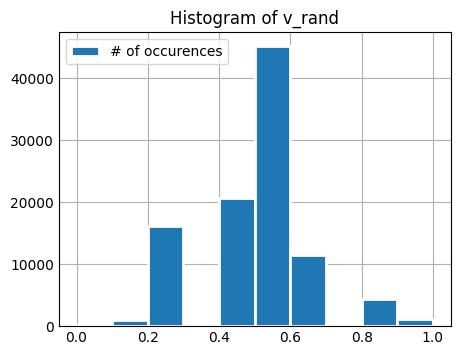

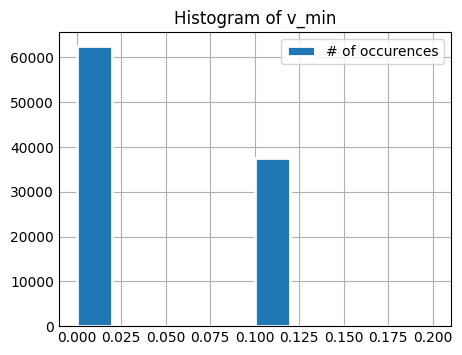

In [6]:
error = abs(v_1 - 0.5)
y = h_bound(coin_flips, error)


fig, ax = plt.subplots(figsize=(4,3))
ax.set_title('Histogram of v_1')
# ax.scatter(v_1[:10000], y[:10000] * 20000, color = 'red', label="error bound")
ax.hist(v_1, bins=10, linewidth=2, edgecolor="white", label = "# of occurences")
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(4,3))
ax.set_title('Histogram of v_rand')
# ax.scatter(v_1[:10000], y[:10000] * 20000, color = 'red', label="error bound")
ax.hist(v_rand, bins=10, linewidth=2, edgecolor="white", label = "# of occurences")
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(4,3))
ax.set_title('Histogram of v_min')
# ax.scatter(v_1[:10000], y[:10000] * 30000, color = 'red', label="error bound")
ax.hist(v_min, bins=10, linewidth=2, edgecolor="white", label = "# of occurences")
plt.legend()
plt.show()

<>:21: SyntaxWarning: invalid escape sequence '\e'
<>:21: SyntaxWarning: invalid escape sequence '\e'
C:\Users\G\AppData\Local\Temp\ipykernel_6376\225929854.py:21: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(ep_values, hoeffding_probs, label='Hoeffding bound $2e^{-2\epsilon^2 n}$', color='red', linestyle='--')


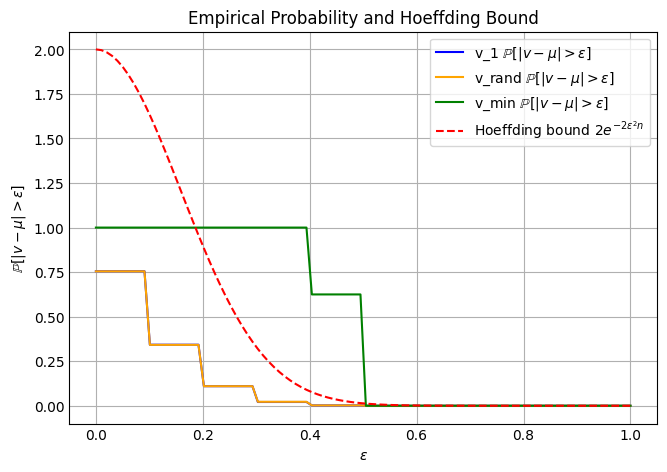

In [8]:
# Parameters
mu = 0.5  # Assuming a fair coin (expected mean)
ep_values = np.linspace(0, 1, 100)  # Range of epsilon values

# Calculate probabilities
empirical_probs_1 = empirical_probability(v_1, mu, ep_values)
empirical_probs_rand = empirical_probability(v_rand, mu, ep_values)
empirical_probs_min = empirical_probability(v_min, mu, ep_values)

hoeffding_probs = h_bound(ep_values, coin_flips) # Hoeffding curve from 0 to 1

# Plotting
plt.figure(figsize=(6, 4))

# Plot empirical probabilities
plt.plot(ep_values, empirical_probs_1, label=r'v_1 $\mathbb{P}[|v - \mu| > \epsilon]$', color='blue')
plt.plot(ep_values, empirical_probs_rand, label=r'v_rand $\mathbb{P}[|v - \mu| > \epsilon]$', color='orange')
plt.plot(ep_values, empirical_probs_min, label=r'v_min $\mathbb{P}[|v - \mu| > \epsilon]$', color='green')

# Plot Hoeffding bound
plt.plot(ep_values, hoeffding_probs, label='Hoeffding bound $2e^{-2\epsilon^2 n}$', color='red', linestyle='--')

plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\mathbb{P}[|v - \mu| > \epsilon]$')
plt.title(r'Empirical Probability and Hoeffding Bound')
plt.legend()
plt.grid(True)
plt.show()
